### Name: Vishesh Gurnani 
Github Link: https://github.com/VisheshGurnani/CustomerChurn

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
churn= pd.read_csv(r"C:\Users\vishe\Jupyter\Introduction to Data Science\Telco Customer Churn.csv")
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
churn.info()
churn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
churn['gender'] = LabelEncoder().fit_transform(churn['gender'])
churn['SeniorCitizen'] = LabelEncoder().fit_transform(churn['SeniorCitizen'])
churn['Partner'] = LabelEncoder().fit_transform(churn['Partner'])
churn['tenure'] = LabelEncoder().fit_transform(churn['tenure'])
churn['PhoneService'] = LabelEncoder().fit_transform(churn['PhoneService'])
churn['MultipleLines'] = LabelEncoder().fit_transform(churn['MultipleLines'])
churn['InternetService'] = LabelEncoder().fit_transform(churn['InternetService'])
churn['OnlineSecurity'] = LabelEncoder().fit_transform(churn['OnlineSecurity'])
churn['OnlineBackup'] = LabelEncoder().fit_transform(churn['OnlineBackup'])
churn['DeviceProtection'] = LabelEncoder().fit_transform(churn['DeviceProtection'])
churn['TechSupport'] = LabelEncoder().fit_transform(churn['TechSupport'])
churn['Contract'] = LabelEncoder().fit_transform(churn['Contract'])
churn['PaymentMethod'] = LabelEncoder().fit_transform(churn['PaymentMethod'])
churn['Churn'] = LabelEncoder().fit_transform(churn['Churn'])

churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,No,1,0,1,0,0,...,0,0,No,No,0,Yes,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,No,34,1,0,0,2,...,2,0,No,No,1,No,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,No,2,1,0,0,2,...,0,0,No,No,0,Yes,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,No,45,0,1,0,2,...,2,2,No,No,1,No,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,No,2,1,0,1,0,...,0,0,No,No,0,Yes,2,70.70,151.65,1


In [6]:
#convert the TotalCharges to numeric
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   object 


In [8]:
scaler = StandardScaler()
churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']])

In [9]:
churn1= churn.drop(columns=['customerID'])
churn1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.439916,1,No,-1.277445,0,1,0,0,2,0,0,No,No,0,Yes,2,-1.160323,-0.994194,0
1,1,-0.439916,0,No,0.066327,1,0,0,2,0,2,0,No,No,1,No,3,-0.259629,-0.173740,0
2,1,-0.439916,0,No,-1.236724,1,0,0,2,2,0,0,No,No,0,Yes,3,-0.362660,-0.959649,1
3,1,-0.439916,0,No,0.514251,0,1,0,2,0,2,2,No,No,1,No,0,-0.746535,-0.195248,0
4,0,-0.439916,0,No,-1.236724,1,0,1,0,0,0,0,No,No,0,Yes,2,0.197365,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.439916,1,Yes,-0.340876,1,2,0,2,0,2,2,Yes,Yes,1,Yes,3,0.665992,-0.129180,0
7039,0,-0.439916,1,Yes,1.613701,1,2,1,0,2,2,0,Yes,Yes,1,Yes,1,1.277533,2.241056,0
7040,0,-0.439916,1,Yes,-0.870241,0,1,0,2,0,0,0,No,No,0,Yes,2,-1.168632,-0.854514,0
7041,1,2.273159,1,No,-1.155283,1,2,1,0,0,0,0,No,No,0,Yes,3,0.320338,-0.872095,1


In [10]:
corr = churn1.select_dtypes(include=[np.number]).corr()

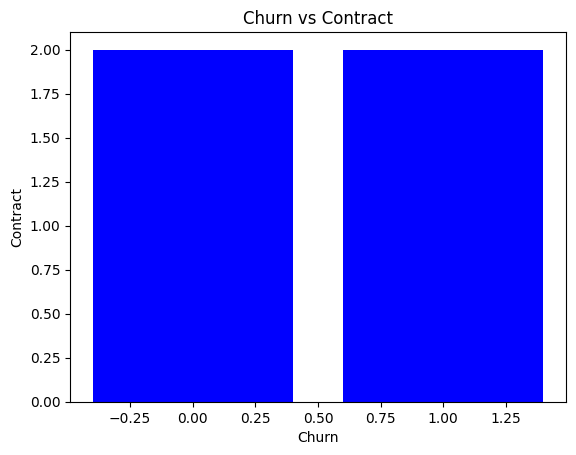

In [63]:
#create a bar graph for senior citizen vs internet service using matplotlib
plt.bar(churn['Churn'], churn['Contract'], color='blue', alpha=0.7)
plt.xlabel('Churn')
plt.ylabel('Contract')
plt.title('Churn vs Contract')
plt.show()

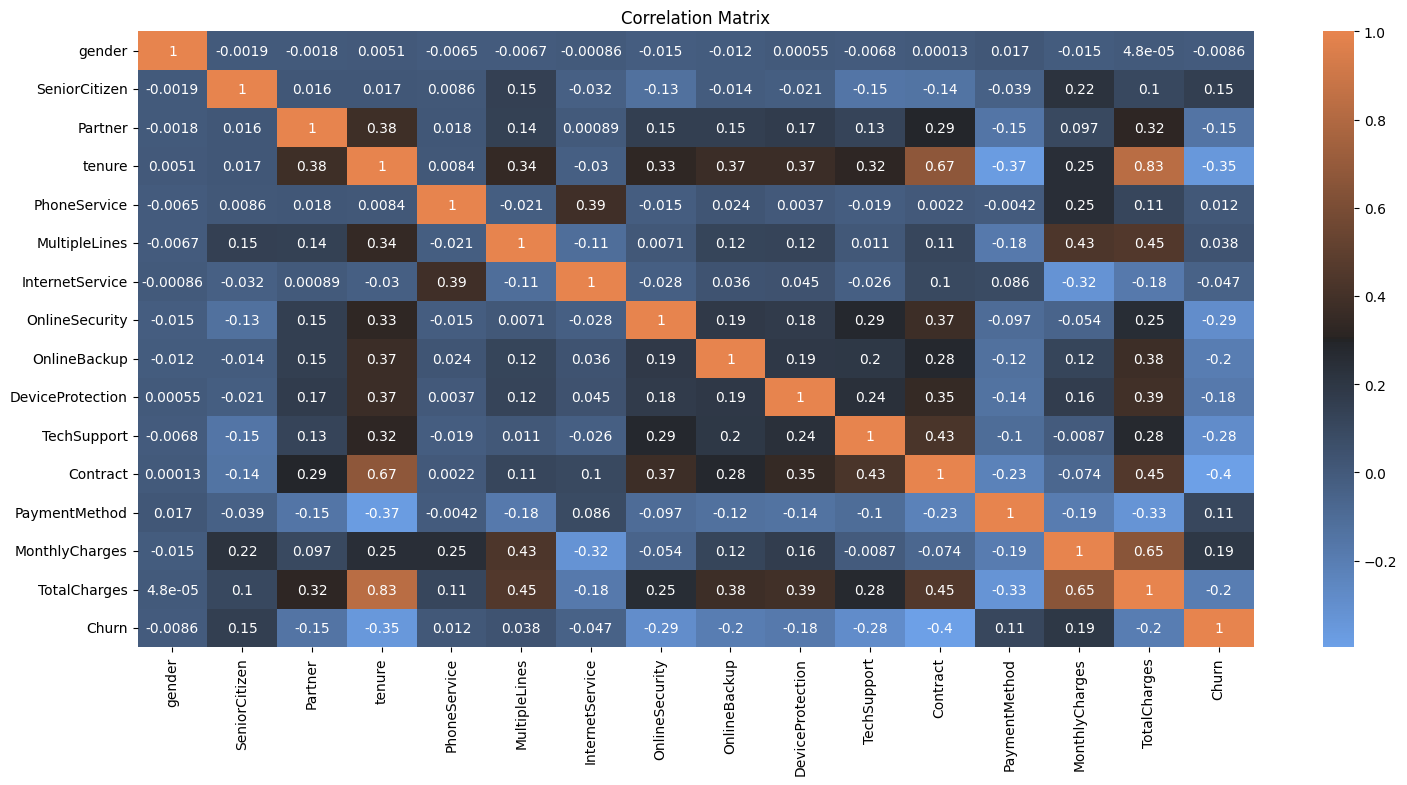

In [11]:
plt.figure(figsize=(18, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
plt.show()

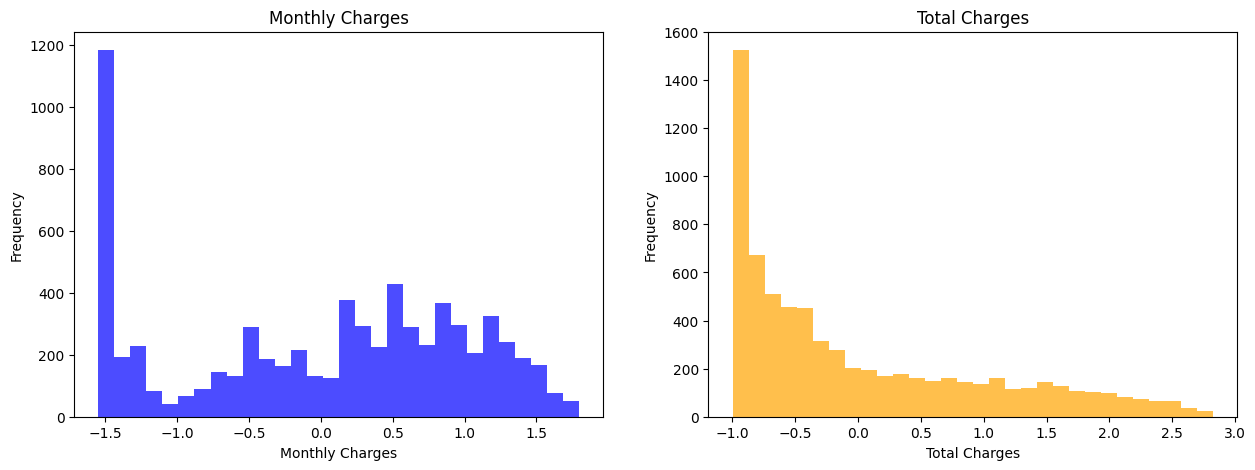

In [12]:
#create a histogram using matplotlib with monthly and total charges
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(churn['MonthlyCharges'], bins=30, color='blue', alpha=0.7)
plt.title('Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(churn['TotalCharges'], bins=30, color='orange', alpha=0.7)
plt.title('Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

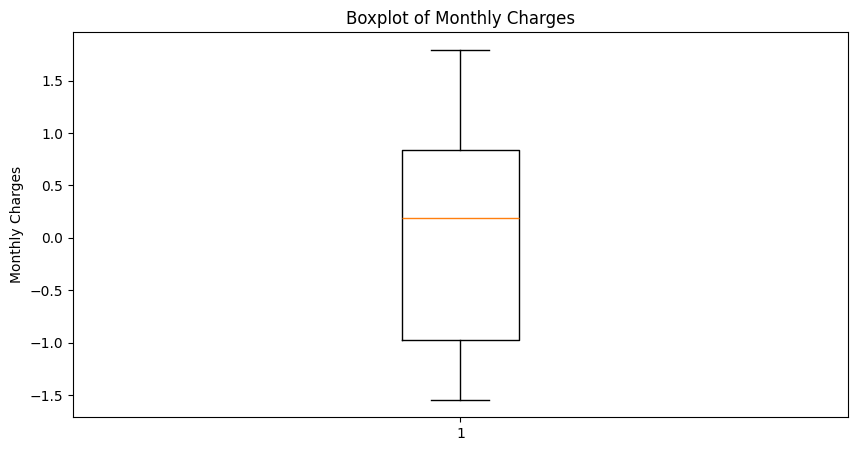

In [13]:
plt.figure(figsize=(10, 5))
plt.title('Boxplot of Monthly Charges')
plt.boxplot(churn['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.show()

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   object 


In [15]:
x = churn.iloc[:, [18,19]].values
y=churn.iloc[:,20].values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [23]:
churn.dropna(inplace=True)
churn.dropna(subset=['TotalCharges'], inplace=True)
churn.dropna(subset=['MonthlyCharges'], inplace=True)
churn.dropna(subset=['tenure'], inplace=True)
churn.dropna(subset=['SeniorCitizen'], inplace=True)
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
mask = ~np.isnan(x_train).any(axis=1)
x_train = x_train[mask]
y_train = y_train[mask]
mask = ~np.isnan(x_test).any(axis=1)
x_test = x_test[mask]
y_test = y_test[mask]


In [38]:
model = LogisticRegression()
# Training the machine learning model on the training data
model.fit(x_train, y_train)

LogisticRegression()

In [42]:
# Making predictions using the trained model
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1407,))

In [48]:
print(np.isnan(x).sum())
x = x[~np.isnan(x).any(axis=1)]


11


In [51]:
y_pred1 = model.predict(x)

In [53]:
churn['Prediction']=y_pred1
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
0,7590-VHVEG,0,-0.439916,1,No,-1.277445,0,1,0,0,...,0,No,No,0,Yes,2,-1.160323,-0.994194,0,0
1,5575-GNVDE,1,-0.439916,0,No,0.066327,1,0,0,2,...,0,No,No,1,No,3,-0.259629,-0.173740,0,0
2,3668-QPYBK,1,-0.439916,0,No,-1.236724,1,0,0,2,...,0,No,No,0,Yes,3,-0.362660,-0.959649,1,0
3,7795-CFOCW,1,-0.439916,0,No,0.514251,0,1,0,2,...,2,No,No,1,No,0,-0.746535,-0.195248,0,0
4,9237-HQITU,0,-0.439916,0,No,-1.236724,1,0,1,0,...,0,No,No,0,Yes,2,0.197365,-0.940457,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,-0.439916,1,Yes,-0.340876,1,2,0,2,...,2,Yes,Yes,1,Yes,3,0.665992,-0.129180,0,0
7039,2234-XADUH,0,-0.439916,1,Yes,1.613701,1,2,1,0,...,0,Yes,Yes,1,Yes,1,1.277533,2.241056,0,0
7040,4801-JZAZL,0,-0.439916,1,Yes,-0.870241,0,1,0,2,...,0,No,No,0,Yes,2,-1.168632,-0.854514,0,0
7041,8361-LTMKD,1,2.273159,1,No,-1.155283,1,2,1,0,...,0,No,No,0,Yes,3,0.320338,-0.872095,1,1


In [54]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[933,  91],
       [217, 166]])

In [55]:
# Evaluating the model performance using accuracy metric
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7810945273631841


In [56]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1024
           1       0.65      0.43      0.52       383

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407

